# Summary Project Description

Projek ini merupakan projek yang ditujukan sebagai Tugas Pertama di kelas <b>Data Science</b> di <b>PT Hacktivate Teknologi Indonesia</b>. Projek ini akan menganalisis data London Crime LSOA dalam rentang Januari 2008 - Desember 2016. Data ini adalah data sekunder yang diperoleh dari situs Kaggle.com.

# Install Required Libraries

In [7]:
!pip install numpy
!pip install geopy
!pip install pandas
!pip install matplotlib
!pip install folium
!pip install wordcloud

In [114]:
# Pembuatan plot visualisasi data
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Pemrosesan data
import pandas as pd
import numpy as np

# Pembuatan map wilayah
from geopy.geocoders import Nominatim

# Membuat peta
import folium
from folium import plugins

# Pembuatan wordcloud
from wordcloud import WordCloud

# Dataset

## Deskripsi Singkat Tentang Dataset

Dataset yang digunakan adalah data kejahatan di wilayah metropolitan utama, seperti kota London yang terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, serta kategori Mayor dan Minor dari Januari 2008 sampai Desember 2016. Data ini terdiri dari 13.490.603 baris data dengan 7 kolom

## Daftar Kolom pada data

1.lsoa_code = kode area polisi
<br>
2.andborough = wilayah kota London yang terkait dengan data statistik
<br>
3.major_category = kategori kejahatan mayor
<br>
4.minor_category = kategori kejahatan minor
<br>
5.value = jumlah kejahatan yang terjadi di wilayah (borough) tertentu pada bulan tertentu
<br>
6.year = ringkasan tahun kejadian
<br>
7.month = ringkasan bulan kejadian

## Membaca Dataset

In [115]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA"]
# read dataset
df_london_crime = pd.read_csv('./dataset/Assignment_1/london_crime_by_lsoa.csv',
                     na_values=missing_values)
df_london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Preprocessing Dataset Sebelum Visualisasi

Hal yang dilakukan pada tahap preprocessing ini adalah:
<br>
<ol>
<li>
Mengetahui dimensi, baris, kolom dari dataset
</li>
<li>  
Mengetahui fitur, attribut, kolom yang terdapat pada dataset
</li>
<li>
Mengetahui tipe data setiap attribut sudah sesuai atau belum
</li>
<li>
Mengetahui missing values yang terdapat pada dataset
</li>
<ul>
<li>
Standard missing values
</li>
<li>
Non Standard missing values
</li>
<li>
Unexpected missing values
</li>
<li>
Summarizing missing values
</li>
</ul>
<li>
Mengatasi missing values dengan mengisinya dengan nilai median dari atribut yang memuat missing values
</li>
</ol>

## Mencari Dimensi, Baris dan Kolom

In [116]:
rows, columns = df_london_crime.shape
print("Dimensi Data")
print(rows, "Rows")
print(columns, "Columns")

Dimensi Data
13490604 Rows
7 Columns


## Mengetahui fitur/atribut/kolom yang terdapat pada dataset

In [117]:
# Menampilkan sample 10 data pertama
df_london_crime.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


## Analisis

Terdapat columns <b>lsoa_code, borough, major_category, minor_category, value, year, month</b> yang terdeteksi

## Menyiapkan Variabel Global 

<b>years</b> : menampung range List of years (2008 - 2016)
<br>
<b>boroughs</b> : menampung range List of borough atau wilayah
<br>
<b>major_categories</b> : menampung range List of major_categories (Kejahatan Mayor)
<br>
<b>minor_categories</b> : menampung range List of minor_categories (Kejahatan Minor)
<br>
<b>colors_list</b> : menampung jenis List of matplotlib colors untuk keperluan plotting
<br>
<b>months</b> : menampung range List of range months from 1 to 12

In [172]:
# list year
years = list(map(int,np.sort(df_london_crime['year'].unique())))

# list boroughs
boroughs = list(df_london_crime['borough'].unique())

# List major_categories
major_categories = list(df_london_crime['major_category'].unique())

# List minor_categories
minor_categories = list(df_london_crime['minor_category'].unique())

## Mengetahui Tipe Data Pada Attribut Dataset

In [119]:
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Analisis

Berdasarkan hasil diatas terdapat tipe data yang digunakan pada data frame df_london_crime
<ol>
<li>Tipe data string (str)</li>
Tipe data ini digunakan untuk kolom [lsoa_code, borough, major_category, minor_category]

<li>Tipe data integer (int)</li>
Tipe data ini digunakan untuk kolom [value, year, month]
</ol>

# Membuat Data Frame Major Crime Pada Tahun (2008 - 2016)

In [120]:
data_major = {}
for year in years:
    # Mengambil data pada dataset london_crime berdasarkan variable global years dan melakukan groupby berdasarkan major_categories dan melakukan sum pada column values
    major_years = df_london_crime[
        df_london_crime['year'] == year
    ].groupby('major_category')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_major[year] = pd.Series(
        data=map(int, major_years.reset_index()['value'].values),
        index=major_years.index
    )

# Membuat dataframe dengan 'Major Categories' sebagai index dan 'Years' sebagai columns
df_major_years = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data_major
)
df_major_years['value'] = df_major_years[years].sum(axis=1)

# Shorting kolom value secara Ascending
df_major_years.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_major_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,value
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


# Membuat Data Frame Minor Crime Pada Tahun (2008 - 2016)

In [121]:
data_minor = {}
for year in years:
    # Mengambil data pada dataset london_crime berdasarkan variable global years 
    # dan melakukan groupby berdasarkan major_categories dan melakukan sum pada column values
    minor_years = df_london_crime[
        df_london_crime['year'] == year
    ].groupby('minor_category')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_minor[year] = pd.Series(
        data=map(int, minor_years.reset_index()['value'].values),
        index=minor_years.index
    )

# Membuat dataframe dengan 'Major Categories' sebagai index dan 'Years' sebagai columns
df_minor_years = pd.DataFrame(
    columns=years,
    index=minor_categories,
    data=data_minor
)
df_minor_years['value'] = df_minor_years[years].sum(axis=1)

# Shorting kolom value secara Ascending
df_minor_years.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_minor_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,value
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


# Data Frame Total Kasus Major Crime Untuk Setiap Wilayah Pada Tahun (2008 - 2016)

In [122]:
data_borough_major = {}
for major_categorie in major_categories:
    # Mengambil data pada dataset london_crime berdasarkan variable global year dan melakukan groupby berdasarkan boroughs 
    # dan melakukan sum pada column values
    borough_major = df_london_crime[df_london_crime['major_category'] == major_categorie].groupby('borough')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_borough_major[major_categorie] = pd.Series(
        data=map(int, borough_major.reset_index()['value'].values),
        index=borough_major.index
    )

# Membuat dataframe dengan 'Boroughs' sebagai index dan 'years' sebagai columns
df_boroughs_major = pd.DataFrame(
    columns=major_categories,
    index=boroughs,
    data=data_borough_major
)
df_boroughs_major['value'] = df_boroughs_major[major_categories].sum(axis=1)

# Shorting kolom value secara Ascending
df_boroughs_major.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_boroughs_major.head()

,Burglary,Violence Against the Person,Robbery,Theft and Handling,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Sexual Offences,value
Westminster,29295,71448,15752,277617,20405,34031,273.0,6148,59.0,455028.0
Lambeth,30199,72726,18408,114899,26136,25083,137.0,4520,70.0,292178.0
Southwark,27980,68356,16153,109432,24450,27381,321.0,4696,40.0,278809.0
Camden,27939,53012,9286,140596,18482,21816,123.0,3857,36.0,275147.0
Newham,25356,66221,16913,106146,24177,18389,323.0,4456,43.0,262024.0


# Data Frame Total Kasus Minor Crime Untuk Setiap Wilayah Pada Tahun (2008 - 2016)

In [123]:
data_borough_minor = {}
for minor_categorie in minor_categories:
    # Mengambil data pada dataset london_crime berdasarkan variable global year dan melakukan groupby berdasarkan boroughs 
    # dan melakukan sum pada column values
    borough_minor = df_london_crime[df_london_crime['minor_category'] == minor_categorie].groupby('borough')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_borough_minor[minor_categorie] = pd.Series(
        data=map(int, borough_minor.reset_index()['value'].values),
        index=borough_minor.index
    )

# Membuat dataframe dengan 'Boroughs' sebagai index dan 'years' sebagai columns
df_boroughs_minor = pd.DataFrame(
    columns=minor_categories,
    index=boroughs,
    data=data_borough_minor
)
df_boroughs_minor['value'] = df_boroughs_minor[minor_categories].sum(axis=1)

# Shorting kolom value secara Ascending
df_boroughs_minor.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_boroughs_minor.head()

,Burglary in Other Buildings,Other violence,Personal Property,Other Theft,Offensive Weapon,Criminal Damage To Other Building,Theft/Taking of Pedal Cycle,Motor Vehicle Interference & Tampering,Theft/Taking Of Motor Vehicle,Wounding/GBH,...,Assault with Injury,Drug Trafficking,Other Drugs,Business Property,Other Notifiable,Other Sexual,Theft From Motor Vehicle,Rape,Murder,value
Westminster,17184,3135,15050,142032,1818,3990,12731,1501.0,6108,6145,...,20219,1657,268.0,702,5741,54.0,21735,5.0,28.0,455028.0
Lambeth,8815,3841,16951,44006,2532,2896,9771,1882.0,8475,7090,...,21103,1874,263.0,1457,4213,57.0,20019,13.0,53.0,292178.0
Southwark,11742,3380,14939,42879,2061,2852,10916,2176.0,8836,6206,...,19793,2047,180.0,1214,4483,30.0,18103,10.0,52.0,278809.0
Camden,13257,1922,8617,64265,1112,2989,11347,1923.0,6412,4078,...,14516,1557,219.0,669,3653,31.0,18292,5.0,24.0,275147.0
Newham,8566,3178,15779,33289,1852,2145,4100,2662.0,10531,6358,...,19452,1155,81.0,1134,4271,27.0,28771,16.0,56.0,262024.0


# Visualisasi Data

## 1. Area Chart

<b>Questions?</b>
<ol>
<li>Bagaimana visualisasi data 5 kasus 'mayor crime' tertinggi di London dari tahun 2008 - 2016?</li>
<li>Bagaimana visualisasi data 5 kasus 'minor crime' tertinggi di London dari tahun 2008 - 2016?</li>
</ol>

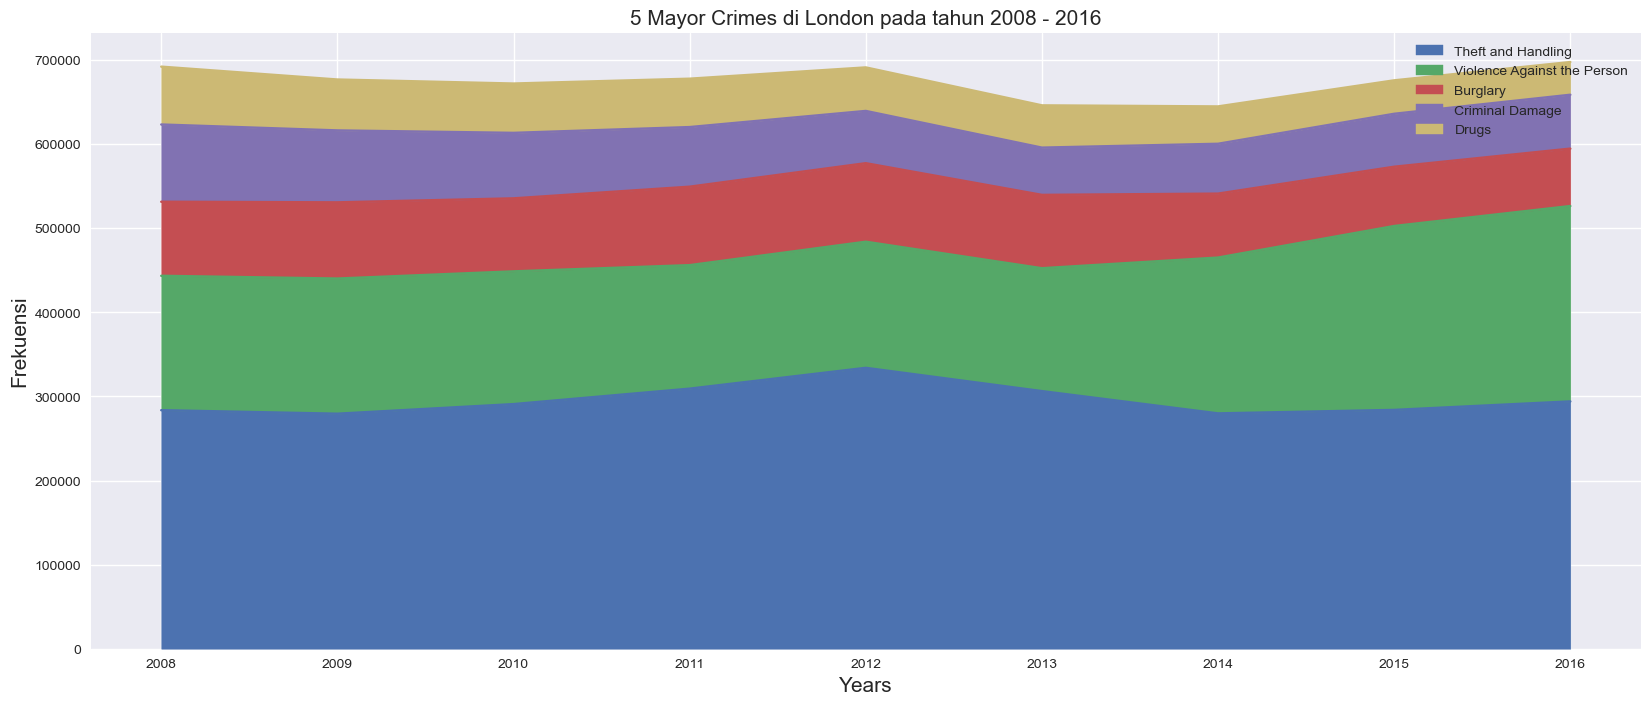

In [124]:
df_area = df_major_years[years].head().transpose()
df_area.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)
plt.title('5 Mayor Crimes di London pada tahun 2008 - 2016', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Frekuensi', fontsize=15)
plt.legend(loc='upper right', fontsize=10)
plt.show()

<b>Analisis Question 1</b>

Untuk kejahatan kategori major crime ada <b>'Drugs'</b> maenjadi masalah terbesar hampir menyentuh 700.000 kasus dengan kasus tertinggi di tahun 2016. Nomor 2 adalah <b>'Criminal Damage'</b> dengan nilai tertinggi melebihi 600.000 kasus pada tahun 2016, di nomor 3 dengan <b>'Burglary'</b> dengan tingkat tertinggi pada tahun 2016 melebihi 500.000 kasus, di nomor 4 ada <b>'Violence Against the Person'</b> dengan puncak tertinggi di tahun 2016 melebihi 500.000 kasus dan di nomor 5 ada kejahatan <b>'Theft and Handling'</b> dengan kasus tertinggi di penghujung tahun 2011 dengan lebih dari 300.000 kasus.

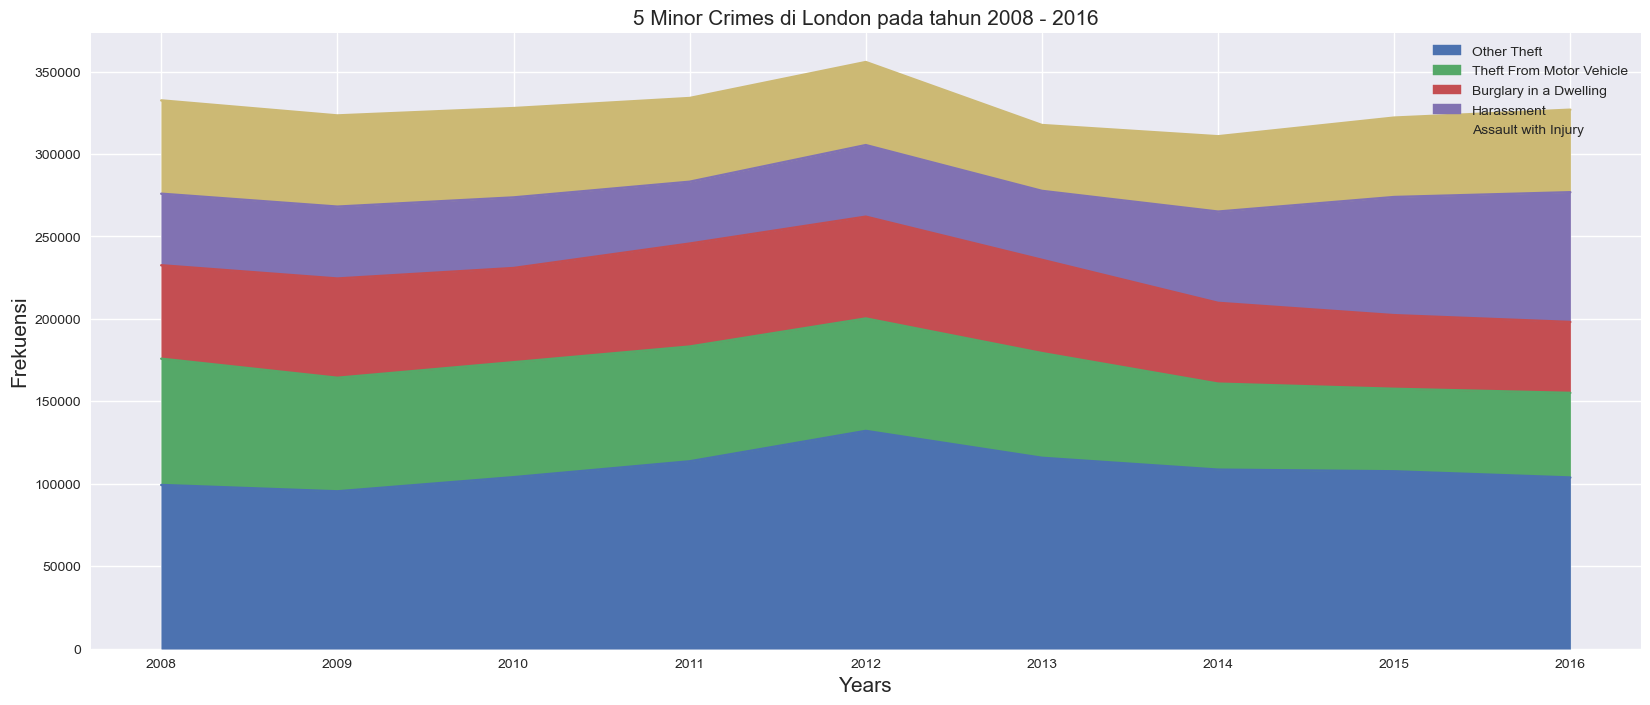

In [125]:
df_area = df_minor_years[years].head().transpose()
df_area.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)
plt.title('5 Minor Crimes di London pada tahun 2008 - 2016', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Frekuensi', fontsize=15)
plt.legend(loc='upper right', fontsize=10)
plt.show()

<b>Analisis Question 2</b>

Untuk kejahatan kategori minor crime ada <b>'Assault with injury'</b> maenjadi masalah terbesar melebihi 350.000 kasus dengan kasus tertinggi di tahun 2012. Nomor 2 adalah <b>'Harassment'</b> dengan nilai hampir mendekati 300.000 kasus pada tahun 2012, di nomor 3 dengan <b>'Burglary in a Dwelling'</b> dengan tingkat tertinggi pada tahun 2012 melebihi 250.000 kasus, di nomor 4 ada <b>'Theft from Motor Vehicle'</b> dengan puncak tertinggi di tahun 2012 hampir mendekati 200.000 kasus dan di nomor 5 ada kejahatan <b>'Other Thieft'</b> dengan kasus tertinggi di tahun 2012 dengan lebih dari 100.000 kasus.

## 2. Line Chart

<b>Questions?</b>

<ol>
<li>Apa kasus kejahatan besar tertinggi dan dimana wilayah di London yang terjadi dari tahun 2008 - 2016?</li>
<li>Apa kasus kejahatan kecil tertinggi dan dimana wilayah London yang terjadi dari tahun 2008 - 2016?</li>
</ol>

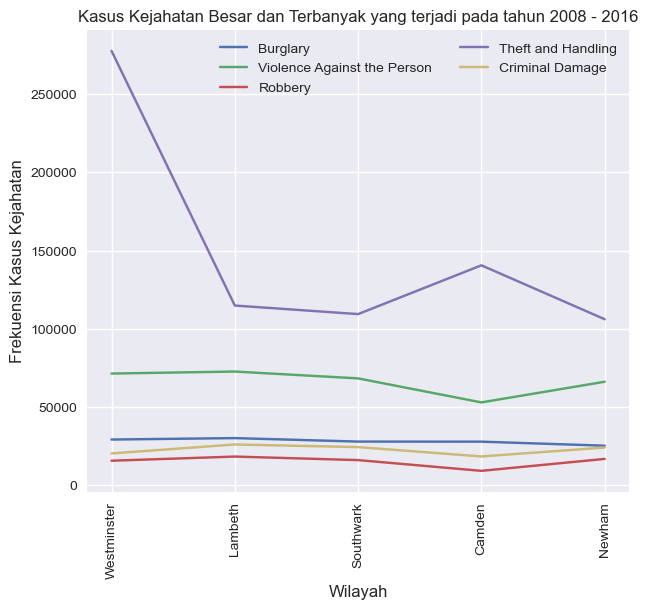

In [126]:
plt.figure(figsize=(7,6))
plt.plot(df_boroughs_major[major_categories[:5]].head())
plt.xticks(range(len(df_boroughs_major[:5].index.unique())), df_boroughs_major[:5].index.unique())
plt.legend(major_categories[:5], ncol=2)
plt.ylabel('Frekuensi Kasus Kejahatan', fontsize=12)
plt.xlabel('Wilayah', fontsize=12)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.title('Kasus Kejahatan Besar dan Terbanyak yang terjadi pada tahun 2008 - 2016', fontsize=12)
plt.show()

<b>Analisis Question 1</b>

Ada beberapa hal yang bisa diambil dari 2 grafik diatas. Ada jenis kejahatan pada kategori besar <b>'Theft and handling'</b> yang menjadi terbesar dengan total lebih dari 250.000 kasus di wilayah Westminster pada tahun 2008-2016.

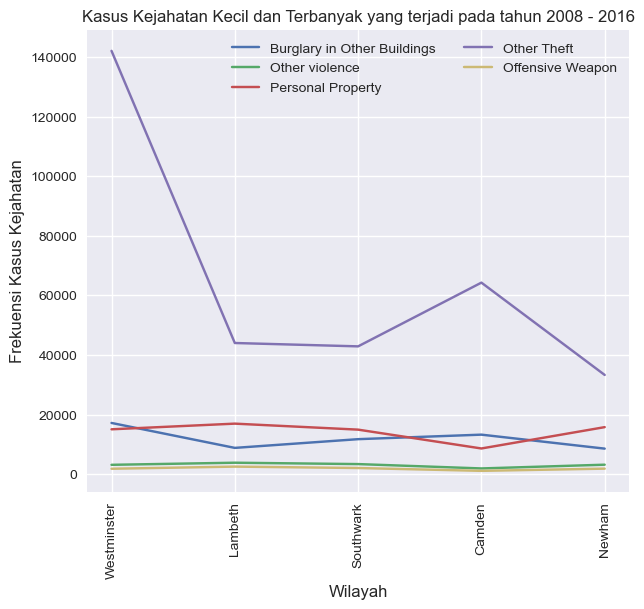

In [127]:
plt.figure(figsize=(7,6))
plt.plot(df_boroughs_minor[minor_categories[:5]].head())
plt.xticks(range(len(df_boroughs_minor.head().index.unique())), df_boroughs_minor.head().index.unique())
plt.legend(minor_categories, ncol=2, loc='upper right', fontsize=10)
plt.ylabel('Frekuensi Kasus Kejahatan', fontsize=12)
plt.xlabel('Wilayah', fontsize=12)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.title('Kasus Kejahatan Kecil dan Terbanyak yang terjadi pada tahun 2008 - 2016', fontsize=12)
plt.show()

<b>ANALISIS Question 2</b>

Untuk kejahatan kategori kecil ada <b>'other theft'</b> maenjadi masalah terbesar melebihi menyentuh 140.000 kasus di wilayah Westminster pada tahun 2008-2016.

## 3. Histogram Chart

<b>Questions?</b>

<ol>
<li>Bagaimana visualisasi 5 tahun dengan kasus 'Minor Crime' terbanyak?</li>
</ol>

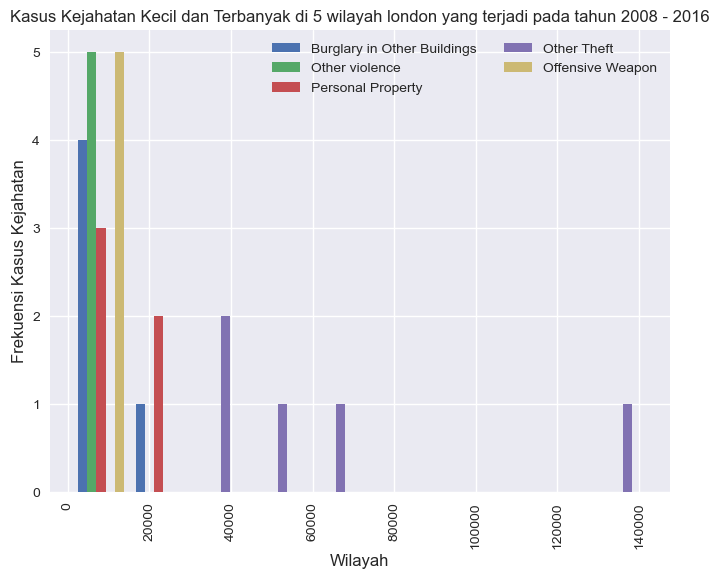

In [159]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.hist(df_boroughs_minor[minor_categories[:5]].head())
plt.legend(df_boroughs_minor[minor_categories[:5]].head(), ncol=2)
plt.ylabel('Frekuensi Kasus Kejahatan', fontsize=12)
plt.xlabel('Wilayah', fontsize=12)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.title('Kasus Kejahatan Kecil dan Terbanyak di 5 wilayah london yang terjadi pada tahun 2008 - 2016', fontsize=12)
plt.show()

<b>Analisis Question 1</b>

Ada beberapa hal yang bisa dianalisis dari grafik histogram di atas.
<ol>
<li>Grafik di atas menampilkan visualisasi histogram yang sudah dibuat dengan 'Other Violence' sebagai yang tertinggi.
</li>
</ol>

## 4. Box Plot Chart

<b>Questions?</b>

<ol>
<li>Bagaimana visualisasi distribusi dengan kasus 'Major Crime' disetiap wilayah tiap tahunnya?</li>
</ol>

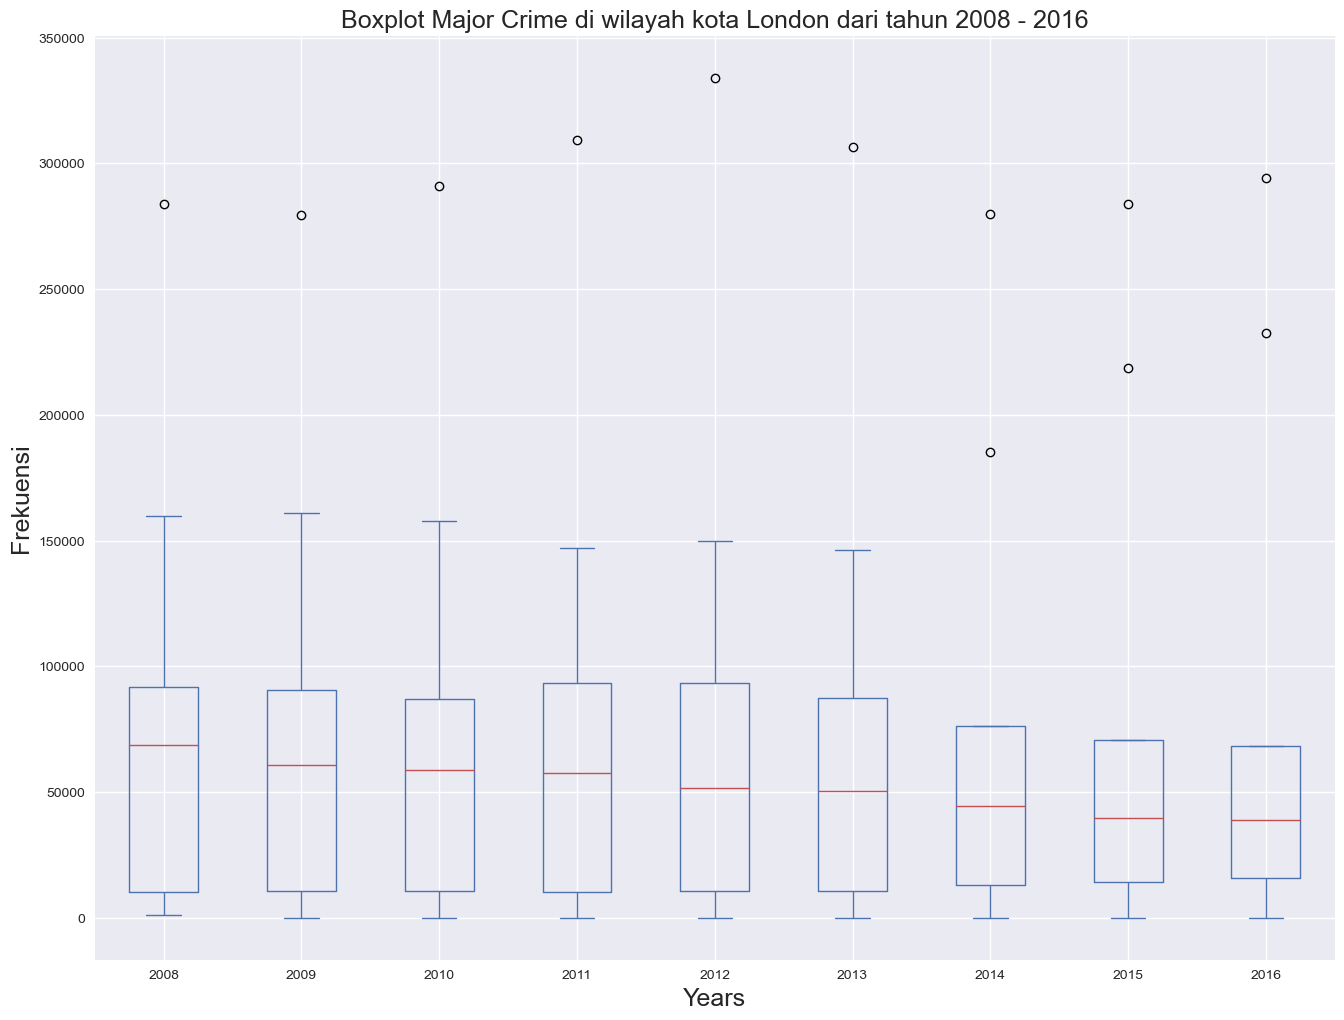

In [129]:
df_major_years[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Frekuensi', fontsize=18)
plt.title('Boxplot Major Crime di wilayah kota London dari tahun 2008 - 2016',  fontsize=18)
plt.show()

<b>Analisis Question 1</b>

Ada beberapa hal yang bisa dianalisis dari grafik boxplot di atas.
<ol>
<li>Grafik di atas menampilkan visualisasi boxplot yang sudah dibuat dimana pada setiap tahunnya rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar 50.000 - 80.000 kasus.
</li>
<li>Range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, kecuali 2014 - 2016. Range total kasus kejahatan pada tahun 2014 - 2016 lebih tersebar dibandingkan tahun-tahun lainnya.
</li>
</ol>

## 5. Bar Chart

<b>Questions?</b>

<ol>
<li>Dimana wilayah dengan total Minor Crime tertinggi di tahun 2008 - 2016?</li>
<li>Dimana wilayah dengan total Minor Crime terendah di tahun 2008 - 2016?</li>
</ol>

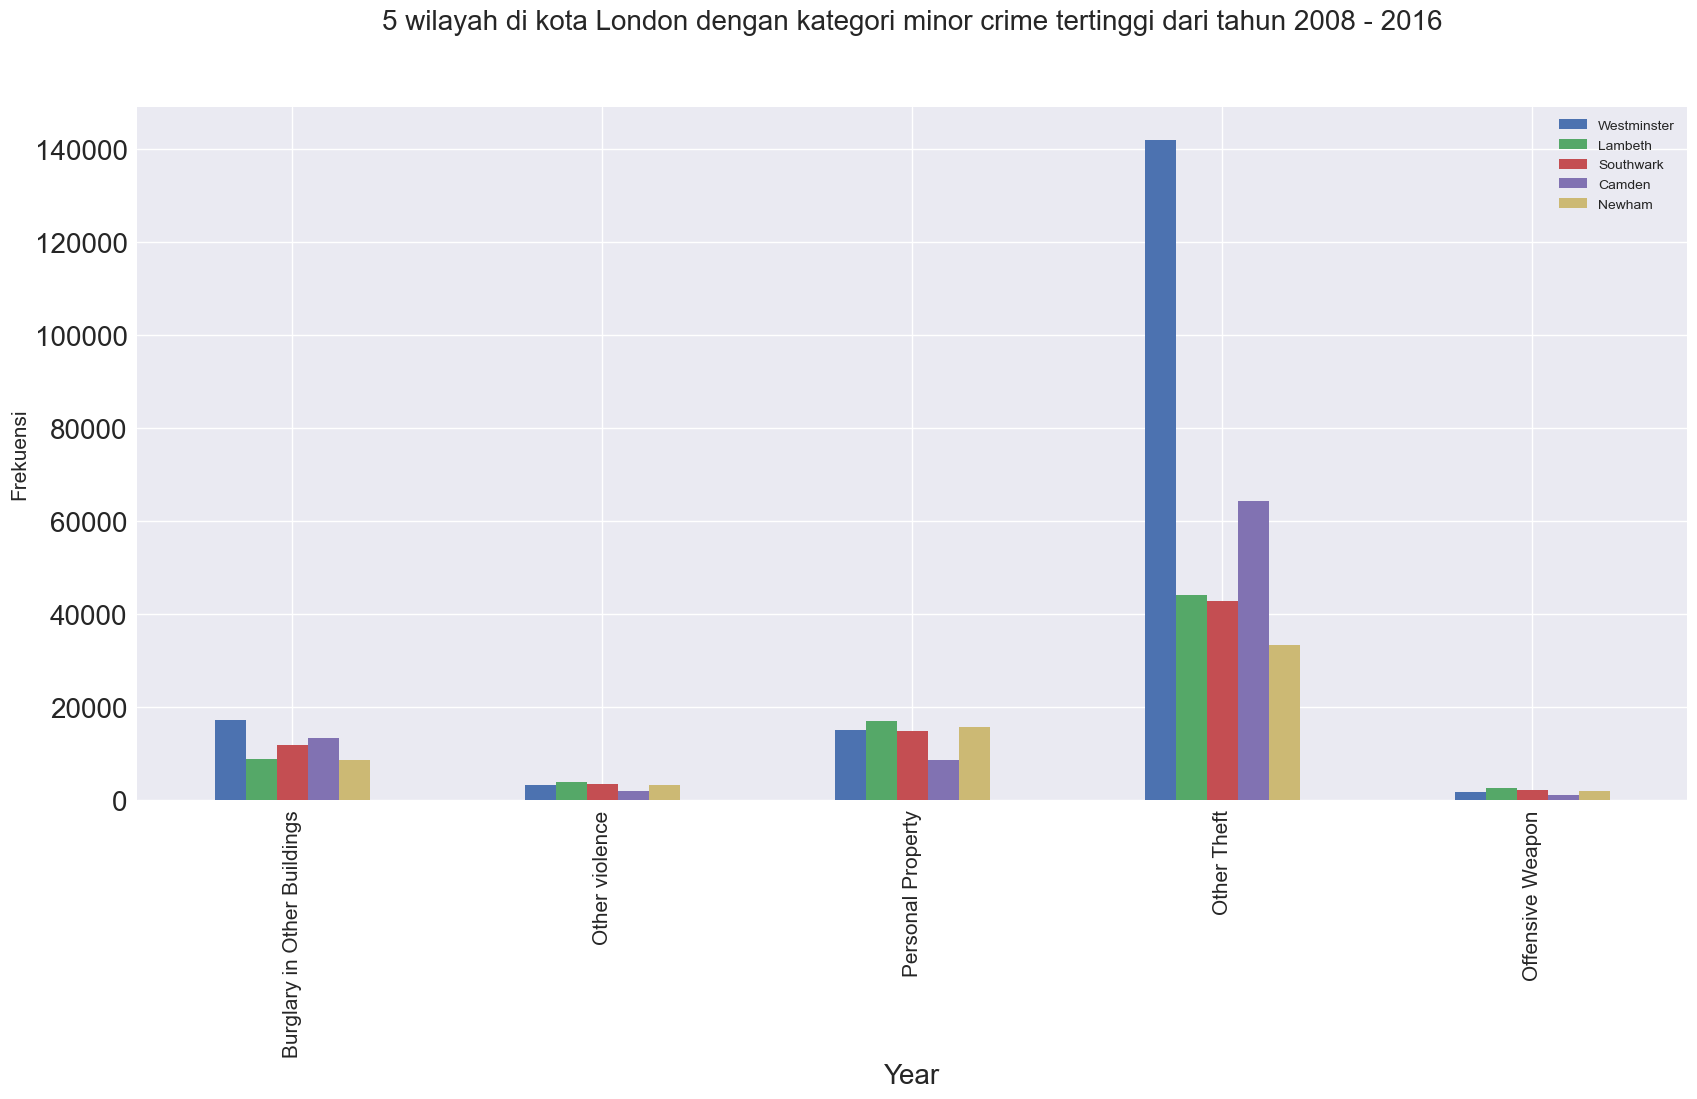

In [130]:
df_boroughs_minor[minor_categories[:5]].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Frekuensi', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London dengan kategori minor crime tertinggi dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

<b>Analisis Question 1</b>

Seperti gambar grafik batang di atas, wilayah <b>Westminster</b> menjadi wilayah dengan total kasus <b>'Other Thieft'</b> sebagai kejahatan tertinggi. Selisihnya dengan keempat wilayah lainnya juga relatif cukup jauh.

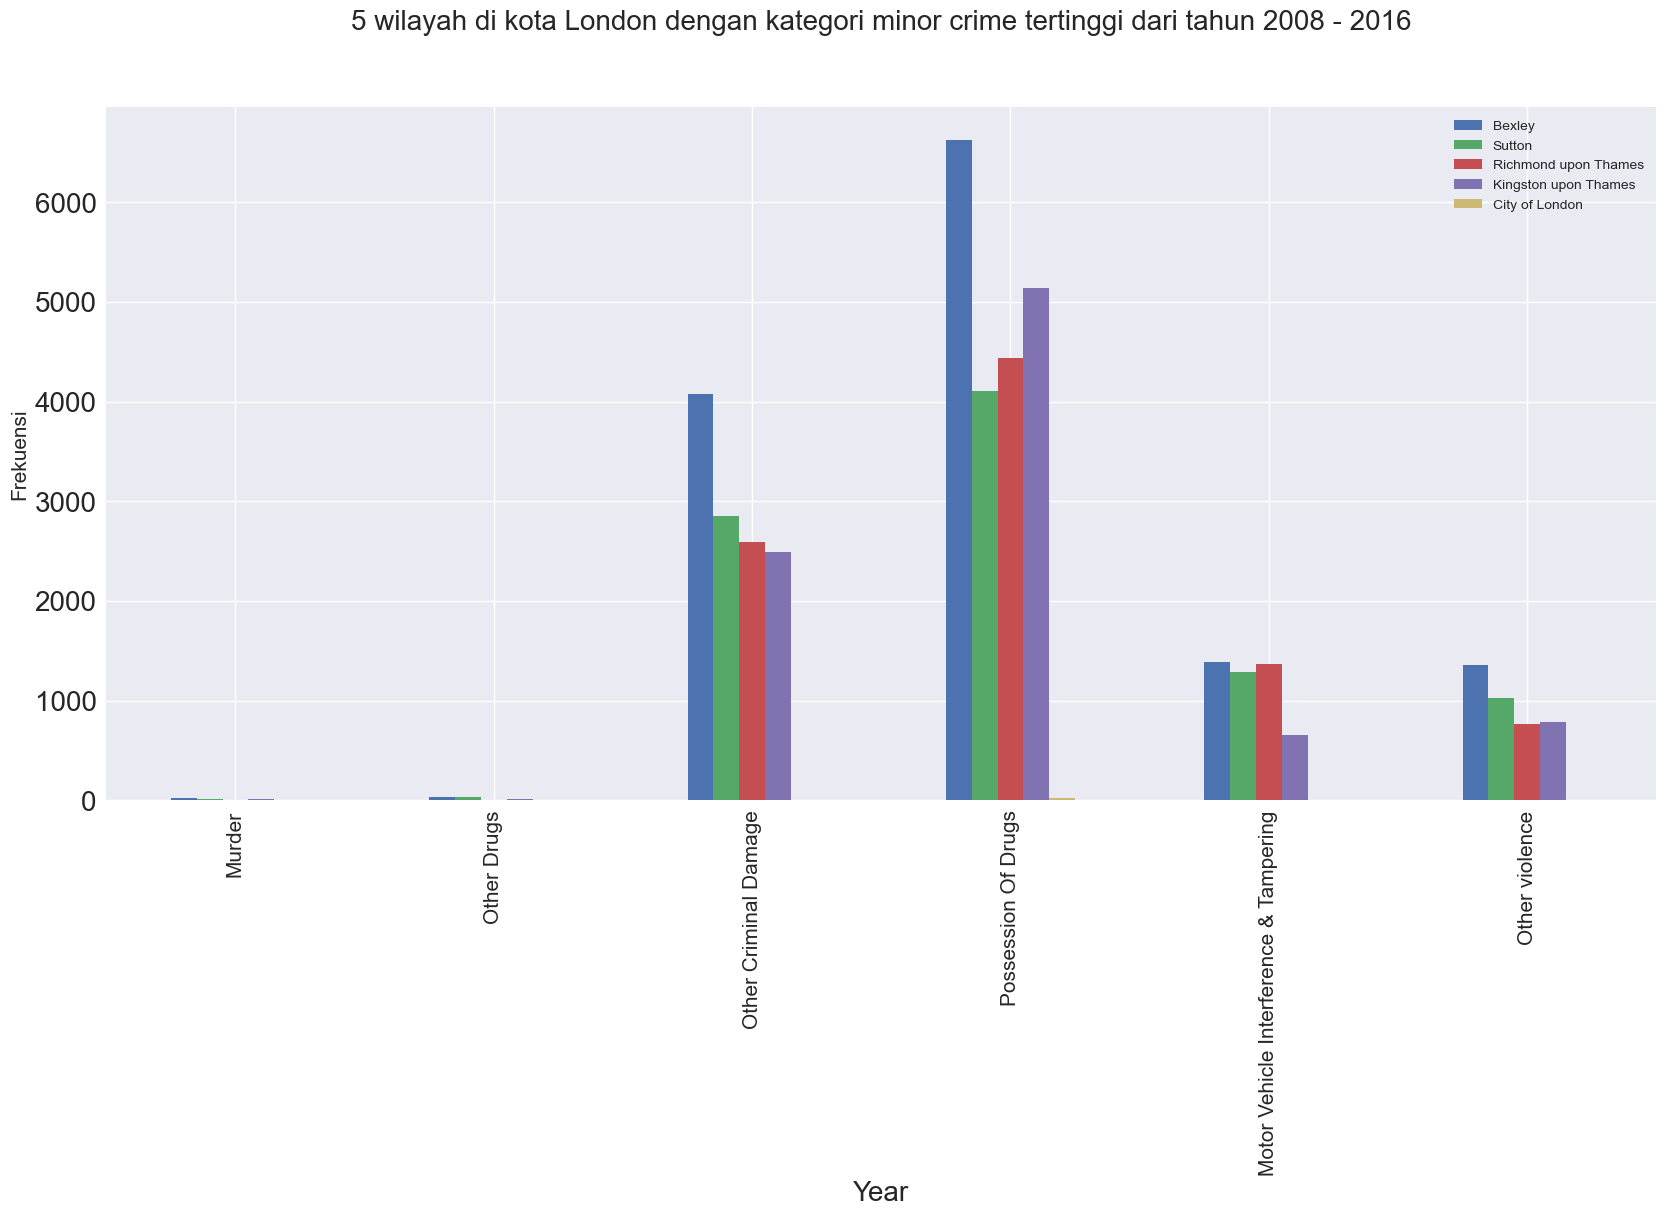

In [131]:
df_boroughs_minor[minor_categories[::-6]].tail().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Frekuensi', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London dengan kategori minor crime tertinggi dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

<b>Analisis Question 2</b>

Seperti gambar grafik batang di atas, wilayah <b>City of London</b> menjadi wilayah dengan total kasus yang sangat rendah. Selisihnya dengan keempat wilayah lainnya juga relatif cukup jauh.

## 6. Pie Chart

<b>Questions?</b>

<ol>
<li>Bagaimana persentase kejahatan minor yang terjadi dari tahun 2008 - 2016?</li>
</ol>

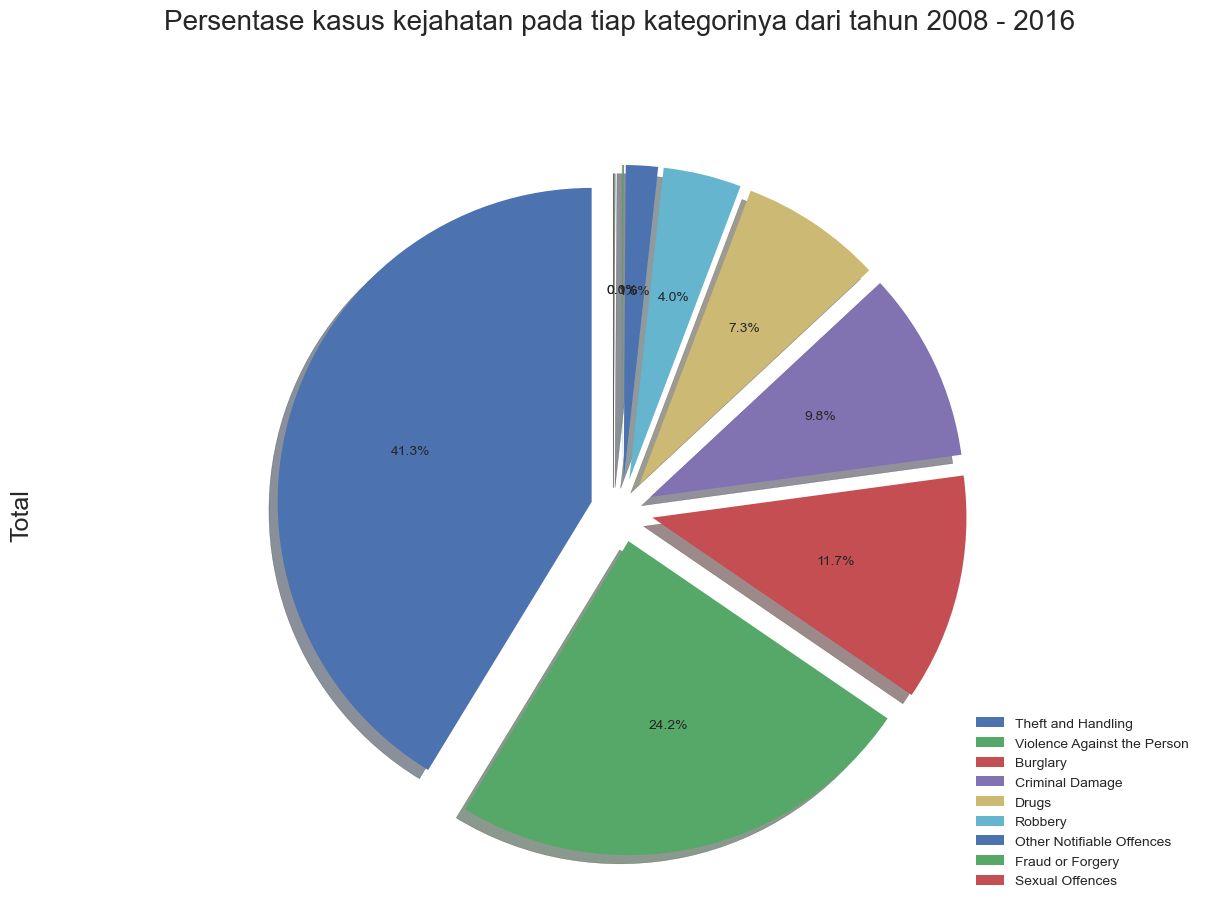

In [132]:
# ratio for each category crime with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
df_pie = df_major_years['value']
df_pie.plot(kind='pie',
            figsize=(15, 10),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            explode=explode_list 
            )

# scale the title up by 12% to match pctdistance
plt.title('Persentase kasus kejahatan pada tiap kategorinya dari tahun 2008 - 2016', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index.values, loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

<b>Analisis Question 1</b>

Theft and Handling; Violence Against the Person; Burglary menjadi tiga kategori kejahatan mayor yang menyumbang total kasus kejahatan dengan persentase tertinggi dari tahun 2008 - 2016. Rincian masing-masing kategori mayor tersebut adalah sebagai berikut:
<ol>
<li>Theft and Handling sebesar 41,3%</li>
<li>Violence Against the Person sebesar 24,2%</li>
<li>Burglary sebesar 11,7%</li>
</ol>

## 7. Scatter Plot

<b>Questions?</b>

<ol>
<li>Bagaimana persentase kejahatan major yang terjadi dari tahun 2008 - 2016?</li>
</ol>

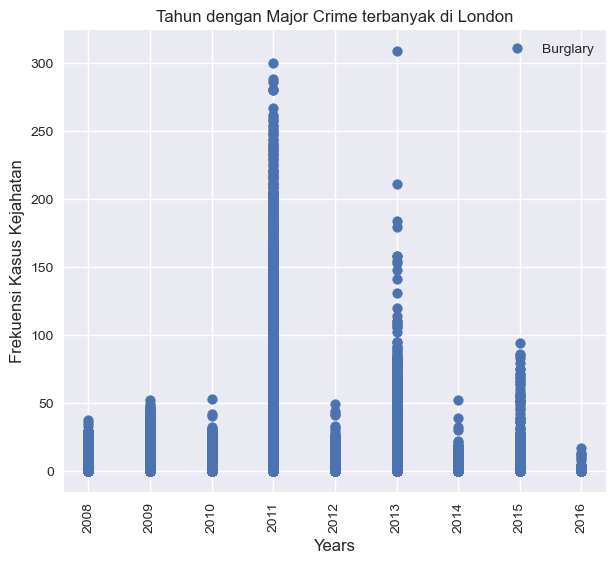

In [156]:
plt.figure(figsize=(7,6))
plt.scatter(df_london_crime['major_category'], df_london_crime['value'])
plt.xticks(range(len(years)), years)
plt.ylabel('Frekuensi Kasus Kejahatan', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.title('Tahun dengan Major Crime terbanyak di London', fontsize=12)
plt.show()

<b>Analisis Question 1</b>

Dari hasil visualisasi di atas menunjukkan bahwa tren penurunan terjadi peningkatan yang sangat signifikan pada tahun 2011 dan terjadi penurunan pada tahun 2012 dan mengalami pelonjakkan tertinggi pada tahun 2013

## 8. Bar Plot

<b>Questions?</b>

<ol>
<li>Bagaimana visualisasi frequensi kejahatan major terbesar di wilayah London pada tahun 2008 - 2016</li>
</ol>

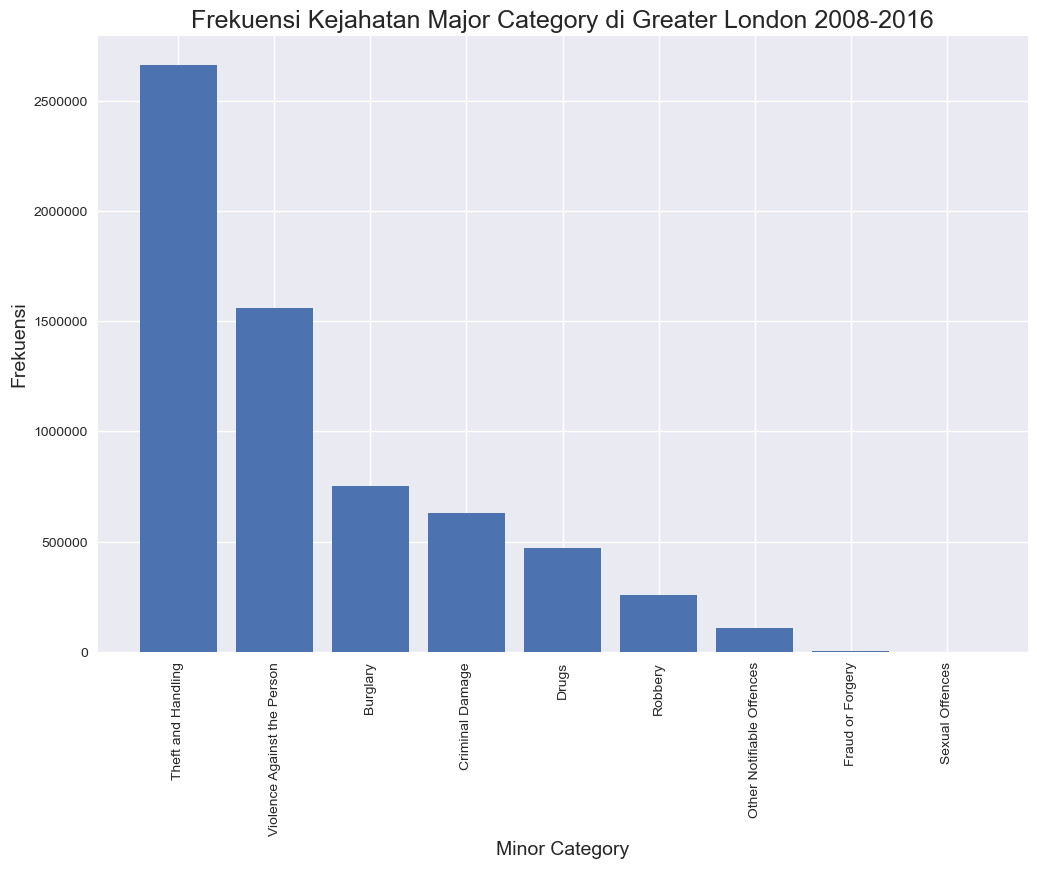

In [168]:
# Mengelompokkan data berdasarkan minor_category dan menjumlahkan nilai kolom 'value'
grouped_data = df_london_crime.groupby('major_category')['value'].sum()
grouped_data = grouped_data.sort_values(ascending=False)

# Membuat visualisasi bar
plt.figure(figsize=(12,8))
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Frekuensi Kejahatan Major Category di Greater London 2008-2016', fontsize=18)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.xlabel('Minor Category', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<b>Analisis Question 1</b>

Frekuensi kejahatan <b>'Theft and Handling'</b> menjadi yang tertinggi dengan lebih dari 2.500.000 kasus, disusul <b>'Violence Against the Person'</b> menjadi peringkat kedua lebih dari 1.500.000. <b>'Burglary'</b> dengan lebih dari 500.000 kasus. <b>'Criminal Damage'</b> dengan lebih dari 500.000 kasus. <b>'Drugs'</b> dengan lebih dari hampir 500.000 kasus.

## 9. WordCloud

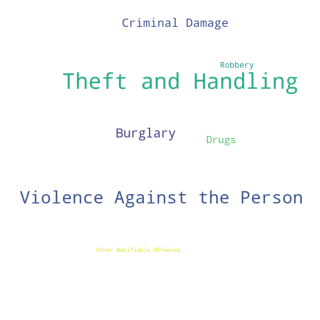

In [166]:
major = df_london_crime.groupby('major_category')['value'].sum()
major_dict = major.to_dict()
# membuat word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(major)

# menampilkan word cloud
plt.figure(figsize = (4, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<b>Analisis Question 1</b>

Hasil dari visualisasi di atas menunjukkan bahwa crime 'Theft and Handling' tercetak dengan fontsize yang lebih besar dari yang lain sehingga dapat disimpulkan bahwa kejahatan tersebut merupakan kejahatan yang banyak terjadi di kota London

# Overall Analysis

Informasi yang bisa diambil setelah melakukan analisis terhadap data LSOA adalah:

<ol>
    <li>Wilayah Westminster menjadi wilayah di London dengan angka kriminalitas tertinggi dan wilayah City of London menjadi wilayah dengan angka kriminalitas terendah dalam rentang tahun 2008 - 2016.</li>
    <li>Kasus kejahatan Theft and Handling paling sering terjadi, sedangkan kasus kejahatan Sexual Offences sangat jarang terjadi di kota London dalam rentang 2008 - 2016.</li>
    <li>Dalam rentang tahun 2011 dan 2012, tindakan minor kejahatan cenderung meningkat, sedangkan pada tahun 2016 kejahatan major cenderung meningkat.
        </li>
</ol>